In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Embedding, LSTM, Dense, Reshape

In [59]:
encodding = {'P': 8, 'C': 19, 'D': 18, 'N': 9, 'Q': 7, 'I': 13, 'S': 5, 'W': 2, 'M': 10, 'G': 15, 'A': 20, 'R': 6, 'F': 16, 'E': 17, 'H': 14, 'T': 4, 'Y': 1, 'V': 3, 'K': 12, 'L': 11, 'NA': 0}


In [60]:
### We start here

In [3]:
imgt_matrix = pd.read_csv('encodded_imgt_positions.csv')

In [9]:
imgt_matrix_wo_na = imgt_matrix.iloc[:, [0,1,2,3,4,8,9,10,11,12]]

In [ ]:
imgt_matrix_wo_na

In [13]:
matrix = imgt_matrix_wo_na.to_numpy()

In [15]:
round(len(matrix)*0.8)

14242

In [16]:
training_set_X = matrix[:round(len(matrix)*0.8),:4]
test_set_X = matrix[round(len(matrix)*0.8):,:4]
training_set_y = matrix[:round(len(matrix)*0.8),4]
test_set_y = matrix[round(len(matrix)*0.8):,4]

In [12]:
### Predicting the 4th position of the sequences

In [17]:

print("Input sequences (training_set_X):")
print(training_set_X)
print("\nTarget sequences (training_set_y):")
print(training_set_y)

Input sequences (training_set_X):
[[ 8 10  3  0]
 [ 5 16 15  5]
 [ 5  5  8  8]
 ...
 [ 5  8  6 18]
 [ 6 18  4 13]
 [15  8  3  0]]

Target sequences (training_set_y):
[ 0  4 11 ...  0 11  0]


In [19]:

print("Input sequences (test_set_X):")
print(test_set_X)
print("\nTarget sequences (test_set_y):")
print(test_set_y)

Input sequences (test_set_X):
[[ 5.  7. 17.  6. 13.  4.]
 [ 5.  8.  8.  4.  5. 15.]
 [ 5. 16.  1. 11.  8.  5.]
 [ 5. 11.  3.  8. 15. 11.]
 [ 5. 11. 20.  3.  2. 15.]
 [ 5. 18.  6. 15.  5.  6.]
 [ 4.  5.  6. 20.  8. 15.]
 [ 5. 14. 15. 11. 20. 15.]
 [ 5.  6.  6.  3. 15. 11.]
 [ 5.  3.  2. 15.  7. 20.]
 [ 5. 13.  6.  2. 15. 11.]
 [18.  5.  6. 15.  6. 15.]
 [ 5.  3. 11.  5.  7.  5.]
 [ 5.  7.  5.  5. 15. 20.]
 [ 5.  7. 15.  7. 15.  9.]
 [15. 11. 20.  8. 11. 14.]
 [ 5. 12. 17.  8. 20.  5.]
 [ 5. 17. 12. 18.  6.  3.]
 [ 5. 11. 11.  8.  8. 15.]
 [ 5. 11.  3.  3. 11. 11.]
 [ 5. 11.  5. 15. 11. 20.]
 [ 5.  7. 18.  5.  5. 15.]
 [ 5. 14.  6. 15. 11. 20.]
 [ 5. 11. 15.  8.  4.  5.]
 [ 5.  1. 16.  5. 15.  3.]
 [ 5.  7.  4.  4. 15.  6.]
 [ 5. 15.  8.  8. 15.  6.]
 [ 5. 11. 17. 11. 15. 11.]
 [ 5.  1.  2.  4. 15.  8.]
 [ 5. 17. 12. 15.  7.  8.]
 [ 5. 16.  6.  6.  6.  4.]
 [ 5.  8. 13. 11.  8. 13.]
 [ 5. 15. 11. 20. 17.  4.]
 [15.  1.  7. 15.  5.  6.]
 [ 5. 18.  6.  8. 15. 11.]
 [ 5. 11. 15.  6. 11. 15.

In [13]:
### Developing the model and increasing accuracy

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Reshape
from tensorflow.keras.optimizers import Adam

# Define parameters
vocab_size = 21  # 20 amino acids
embedding_dim = 8
rnn_units = 32
sequence_length = 4
batch_size = 1  # Use batch size  for prediction later

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    LSTM(rnn_units*2, return_sequences=True),
    Dense(128, activation = "relu"),
    Reshape((sequence_length, 128)),
    LSTM(rnn_units, return_sequences=True),
    Dense(64, activation = "relu"),
    Reshape((sequence_length, 64)),
    LSTM(rnn_units),
    Dense(vocab_size, activation='softmax')

])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 4, 8)              168       
                                                                 
 lstm_7 (LSTM)               (None, 4, 64)             18688     
                                                                 
 dense_7 (Dense)             (None, 4, 128)            8320      
                                                                 
 reshape (Reshape)           (None, 4, 128)            0         
                                                                 
 lstm_8 (LSTM)               (None, 4, 32)             20608     
                                                                 
 dense_8 (Dense)             (None, 4, 64)             2112      
                                                                 
 reshape_1 (Reshape)         (None, 4, 64)            

In [24]:
training_set_y.shape

(14242,)

In [ ]:
# Train the model
history =  model.fit(training_set_X, training_set_y, epochs=30, batch_size = 1)

Epoch 1/30
14242/14242 [==============================] - 140s 9ms/step - loss: 1.6939 - accuracy: 0.5444
Epoch 2/30
14242/14242 [==============================] - 127s 9ms/step - loss: 1.6492 - accuracy: 0.5441
Epoch 3/30
14242/14242 [==============================] - 131s 9ms/step - loss: 1.6361 - accuracy: 0.5442
Epoch 4/30
14242/14242 [==============================] - 128s 9ms/step - loss: 1.6279 - accuracy: 0.5442
Epoch 5/30
14242/14242 [==============================] - 139s 10ms/step - loss: 1.6161 - accuracy: 0.5435
Epoch 6/30
14242/14242 [==============================] - 126s 9ms/step - loss: 1.6030 - accuracy: 0.5455
Epoch 7/30
14242/14242 [==============================] - 129s 9ms/step - loss: 1.5934 - accuracy: 0.5428
Epoch 8/30
14242/14242 [==============================] - 127s 9ms/step - loss: 1.5799 - accuracy: 0.5445
Epoch 9/30
14242/14242 [==============================] - 127s 9ms/step - loss: 1.5706 - accuracy: 0.5447
Epoch 10/30
14242/14242 [====================

In [29]:
test_set_X[[0]]

array([[ 5.,  6.,  4., 15.]])

In [38]:
predictions = model.predict(test_set_X[[200]])

# Display the predictions
print("Raw predictions:\n", predictions)


1/1 [==============================] - 0s 30ms/step
Raw predictions:
 [[3.6837456e-01 5.6220358e-03 3.8173953e-03 9.5339594e-03 3.1510841e-02
  1.4117022e-02 4.1606292e-02 1.8525001e-02 1.6794834e-02 3.7266351e-03
  1.9282008e-03 1.4213787e-02 2.7638725e-03 4.5323875e-03 3.2311911e-03
  1.2388185e-01 4.0851906e-03 1.4069413e-02 2.3738807e-02 2.2642396e-04
  2.9370025e-01]]


In [39]:
test_set_y[200]

20.0

In [40]:
# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=-1)

# Display the predicted class labels
print("Predicted class labels:\n", predicted_classes)

Predicted class labels:
 [0]


In [13]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_set_X, test_set_y)


112/112 [==============================] - 1s 2ms/step - loss: 1.9285 - accuracy: 0.3994


In [14]:
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 1.9285264015197754
Test Accuracy: 0.39943820238113403


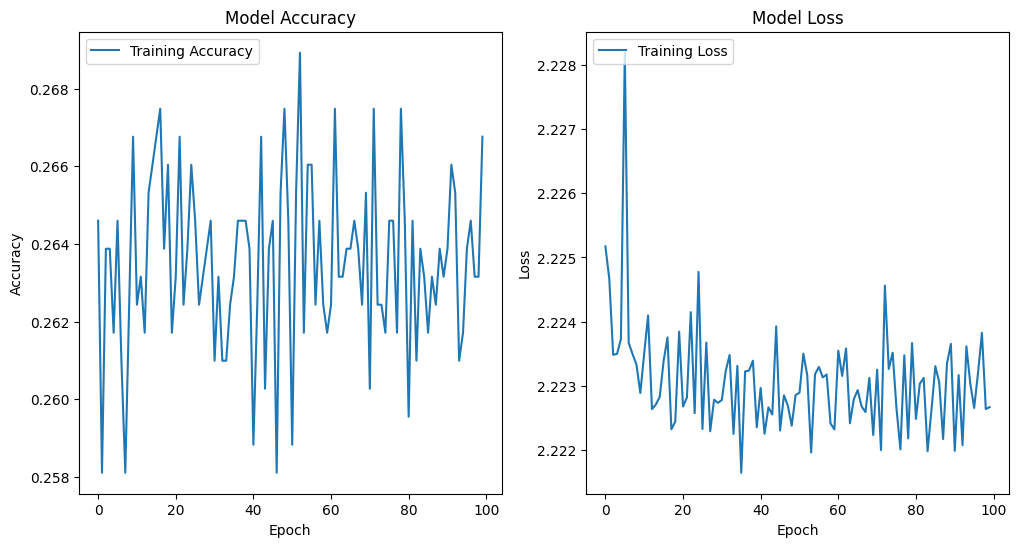

In [135]:
# Plot the training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()